In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160704)
tf.set_random_seed(20160704)

mnist=input_data.read_data_sets("/tmp/data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
x = tf.placeholder(tf.float32, [None,784])
x_image = tf.reshape(x,[-1,28,28,1])


num_filters1 = 32

# 필터크기는 3x3
W_conv1 = tf.Variable(tf.truncated_normal([3,3,1,num_filters1],
                                         stddev=0.1))

# 절댓값을 취하지 않는다. 픽셀의 농도의 의미는 사라지지만
# 이미지의 특징을 추출한 데이터로써는 의미가 있다.
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                      strides=[1,1,1,1],padding='SAME')

# 바이어스 설정
b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1]))

# 임계값 설정, 임계값도 학습
h_conv1_cutoff=tf.nn.relu(h_conv1 + b_conv1)

# 풀링계층에서 절반으로 줄인다
h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                        strides=[1,2,2,1], padding='SAME')

In [0]:
#두번째 단계 합성곱필터와 풀링계층 정의

num_filters2 = 64

# 필터크기는 3x3
W_conv2 = tf.Variable(tf.truncated_normal([3,3,num_filters1,num_filters2],
                                         stddev=0.1))

# 1번 풀링계층에서 나온 것을 받아들인다.
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                      strides=[1,1,1,1],padding='SAME')

# 바이어스 설정
b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2]))

# 임계값 설정, 임계값도 학습
h_conv2_cutoff=tf.nn.relu(h_conv2 + b_conv2)

# 풀링계층에서 절반으로 줄인다
h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                        strides=[1,2,2,1], padding='SAME')

In [0]:
#세번째 단계 합성곱필터와 풀링계층 정의

# 3x3x64x128
num_filters3 = 128

# 필터크기는 3x3
W_conv3 = tf.Variable(tf.truncated_normal([3,3,num_filters2,num_filters3],
                                         stddev=0.1))

# 1번 풀링계층에서 나온 것을 받아들인다.
h_conv3 = tf.nn.conv2d(h_pool2, W_conv3,
                      strides=[1,1,1,1],padding='SAME')

# 바이어스 설정
b_conv3 = tf.Variable(tf.constant(0.1, shape=[num_filters3]))

# 임계값 설정, 임계값도 학습
h_conv3_cutoff=tf.nn.relu(h_conv3 + b_conv3)

# 풀링계층에서 절반으로 줄인다
h_pool3 = tf.nn.max_pool(h_conv3_cutoff, ksize=[1,2,2,1],
                        strides=[1,2,2,1], padding='SAME')

In [0]:
#4번째 단계 합성곱필터와 풀링계층 정의

# 3x3x128x256
num_filters4 = 256

# 필터크기는 3x3
W_conv4 = tf.Variable(tf.truncated_normal([3,3,num_filters3,num_filters4],
                                         stddev=0.1))

# 1번 풀링계층에서 나온 것을 받아들인다.
h_conv4 = tf.nn.conv2d(h_pool3, W_conv4,
                      strides=[1,1,1,1],padding='SAME')

# 바이어스 설정
b_conv4 = tf.Variable(tf.constant(0.1, shape=[num_filters4]))

# 임계값 설정, 임계값도 학습
h_conv4_cutoff=tf.nn.relu(h_conv4 + b_conv4)

# 풀링계층에서 절반으로 줄인다
h_pool4 = tf.nn.max_pool(h_conv4_cutoff, ksize=[1,2,2,1],
                        strides=[1,2,2,1], padding='SAME')

In [0]:
#5번째 단계 합성곱필터와 풀링계층 정의

# 3x3x256x512
#num_filters5 = 512

# 필터크기는 3x3
#W_conv5 = tf.Variable(tf.truncated_normal([3,3,num_filters4,num_filters5],
#                                         stddev=0.1))

# 1번 풀링계층에서 나온 것을 받아들인다.
#h_conv5 = tf.nn.conv2d(h_pool4, W_conv5,
#                      strides=[1,1,1,1],padding='SAME')

# 바이어스 설정
#b_conv5 = tf.Variable(tf.constant(0.1, shape=[num_filters5]))

# 임계값 설정, 임계값도 학습
#h_conv5_cutoff=tf.nn.relu(h_conv5 + b_conv5)

# 풀링계층에서 절반으로 줄인다
#h_pool5 = tf.nn.max_pool(h_conv5_cutoff, ksize=[1,2,2,1],
#                        strides=[1,2,2,1], padding='SAME')

In [7]:
# 전결합층, 드롭아웃 계층, 소프트맥수 함수 정의

# 전결합층
k_k_filters = 2*2*num_filters4

h_pool4_flat = tf.reshape(h_pool4, [-1,k_k_filters])
num_units1 = k_k_filters
num_units2 = 1024
w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool4_flat, w2)+b2)
#hidden2 = tf.nn.elu(tf.matmul(h_pool4_flat, w2)+b2)

#드롭아웃 계층
keep_prob = tf.placeholder(tf.float32)
hidden2_drop=tf.nn.dropout(hidden2, keep_prob)

# 소프트맥수 함수
w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0)+b0)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# 오차함수, 트레이닝 알고리즘, 정답률 정의
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t*tf.log(p))
train_step=tf.train.AdamOptimizer(0.0001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver=tf.train.Saver()

In [9]:
i=0
for _ in range(20000):
  i+=1
  batch_xs, batch_ts = mnist.train.next_batch(50)
  sess.run(train_step, feed_dict={
      x:batch_xs, t:batch_ts, keep_prob:0.5
  })

  if i%500 == 0:
    loss_vals, acc_vals = [], []
    for c in range(4):
      start=int(len(mnist.test.labels)/4*c)
      end=int(len(mnist.test.labels)/4*(c+1))
      loss_val, acc_val = sess.run([loss, accuracy],
                                   feed_dict={x:mnist.test.images[start:end],
                                              t:mnist.test.labels[start:end],
                                              keep_prob:1.0})
      loss_vals.append(loss_val)
      acc_vals.append(acc_val)

    loss_val=np.sum(loss_vals)
    acc_val =np.mean(acc_vals)
    print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))
    saver.save(sess,'cnn_session', global_step=i)

Step: 500, Loss: 1598.552490, Accuracy: 0.950500
Step: 1000, Loss: 925.867493, Accuracy: 0.972800
Step: 1500, Loss: 869.503418, Accuracy: 0.969800
Step: 2000, Loss: 602.885132, Accuracy: 0.981200
Step: 2500, Loss: 555.276001, Accuracy: 0.981700
Step: 3000, Loss: 565.828003, Accuracy: 0.981400
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Step: 3500, Loss: 468.206360, Accuracy: 0.985000
Step: 4000, Loss: 510.078857, Accuracy: 0.982500
Step: 4500, Loss: 514.610901, Accuracy: 0.982800
Step: 5000, Loss: 421.516205, Accuracy: 0.986600
Step: 5500, Loss: 521.572571, Accuracy: 0.982800
Step: 6000, Loss: 387.750793, Accuracy: 0.988100
Step: 6500, Loss: 349.658325, Accuracy: 0.988700
Step: 7000, Loss: 391.418457, Accuracy: 0.987100
Step: 7500, Loss: 419.562988, Accuracy: 0.986500
Step: 8000, Loss: 405.609406, Accuracy: 0.986900
Step: 8500, Loss: 423.500793, Accuracy: 0.986100
Step: 9000, Loss: 349.964630, Accuracy: 0.989200
Step: 9500, Loss: 349.321045, Accu

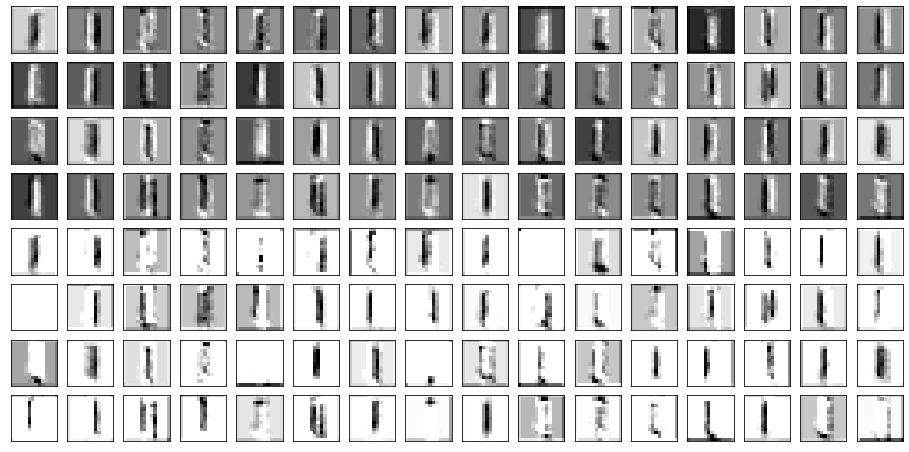

In [10]:
# 두번째 단계의 필터를 적용한 이미지 출력
conv2_vals, cutoff2_vals = sess.run(
    [h_conv2, h_conv2_cutoff], feed_dict={x:batch_xs,keep_prob:1.0}
)
fig=plt.figure(figsize=(16,8))

for f in range(num_filters2):
  subplot=fig.add_subplot(8,16,f+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.imshow(conv2_vals[0,:,:,f],
                 cmap=plt.cm.gray_r, interpolation='nearest')
  
for f in range(num_filters2):
  subplot=fig.add_subplot(8,16,num_filters2 +f+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.imshow(cutoff2_vals[0,:,:,f],
                 cmap=plt.cm.gray_r, interpolation='nearest')